Regression Problem Example

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=50, n_features=5, noise=0.1, random_state=42)

In [4]:
x= pd.DataFrame(x)

In [5]:
x.head()

,0,1,2,3,4
0,-0.234153,0.647689,1.523030,-0.138264,0.496714
1,-0.919424,-1.062304,0.473592,0.068563,-1.550663
2,0.196861,-1.959670,-1.328186,0.208864,-1.220844
3,0.542560,0.767435,-0.469474,1.579213,-0.234137
4,-0.291694,0.375698,-0.600639,-1.150994,0.110923


In [6]:
y[:5]

array([ 190.0388145 , -217.9747052 , -349.06168959,   97.64857437,
        -49.3269365 ])

In [8]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [9]:
fs= SelectKBest(score_func=mutual_info_regression, k=3)
fs.fit(x,y)

,"score_func score_func: callable, default=f_classifFunction taking two arrays X and y, and returning a pair of arrays(scores, pvalues) or a single array with scores.Default is f_classif (see below ""See Also""). The default function onlyworks with classification tasks... versionadded:: 0.18",<function mut...t 0x119a1d760>
,"k k: int or ""all"", default=10Number of top features to select.The ""all"" option bypasses selection, for use in a parameter search.",3


In [10]:
fs.scores_

array([0.13665123, 0.20985522, 0.        , 0.        , 0.10086053])

In [11]:
mi_score = pd.Series(fs.scores_, index=x.columns)
mi_score

0    0.136651
1    0.209855
2    0.000000
3    0.000000
4    0.100861
dtype: float64

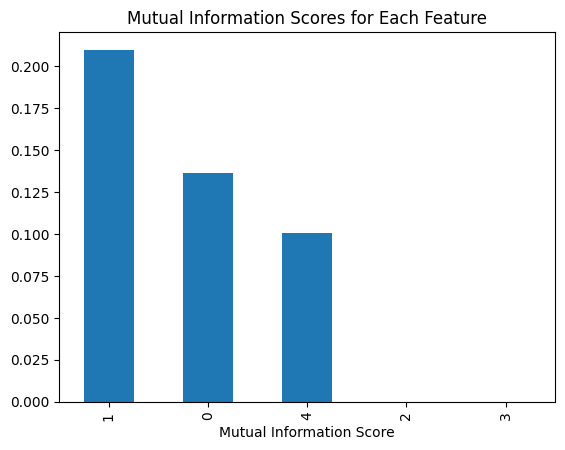

In [14]:
mi_score.sort_values(ascending=False).plot.bar()
plt.xlabel("Mutual Information Score")
plt.title("Mutual Information Scores for Each Feature")
plt.show()

In [16]:
x.head()

,0,1,2,3,4
0,-0.234153,0.647689,1.523030,-0.138264,0.496714
1,-0.919424,-1.062304,0.473592,0.068563,-1.550663
2,0.196861,-1.959670,-1.328186,0.208864,-1.220844
3,0.542560,0.767435,-0.469474,1.579213,-0.234137
4,-0.291694,0.375698,-0.600639,-1.150994,0.110923


In [15]:
x_selected = fs.fit_transform(x,y)
x_selected = pd.DataFrame(x_selected)
x_selected.head()

,0,1,2
0,-0.234153,0.647689,0.496714
1,-0.919424,-1.062304,-1.550663
2,0.196861,-1.959670,-1.220844
3,0.542560,0.767435,-0.234137
4,-0.291694,0.375698,0.110923


## Clasification Problem

In [17]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif   

In [18]:
x,y = make_classification(n_samples=50, n_features=5, n_classes=2, random_state=42)
x= pd.DataFrame(x)
x.head()

,0,1,2,3,4
0,-1.169215,1.144863,-0.974682,1.583077,-0.694705
1,-0.848883,1.100919,-0.820682,1.215244,-0.532098
2,-0.488470,0.782047,-1.191303,0.735572,-0.321453
3,-0.799602,-0.339412,-0.919424,0.808465,-0.359732
4,0.540444,-0.783316,-0.034712,-0.793821,0.347233


In [19]:
y[:5]

array([1, 1, 1, 1, 0])

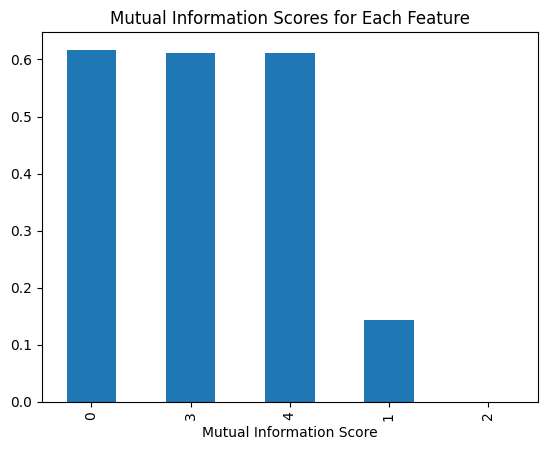

In [20]:
fs = SelectKBest(score_func=mutual_info_classif, k=3)
fs.fit(x,y)
mi_scores=pd.Series(fs.scores_, index=x.columns)
mi_scores.sort_values(ascending=False).plot.bar()
plt.xlabel("Mutual Information Score")
plt.title("Mutual Information Scores for Each Feature")
plt.show()

In [22]:
x.head()

,0,1,2,3,4
0,-1.169215,1.144863,-0.974682,1.583077,-0.694705
1,-0.848883,1.100919,-0.820682,1.215244,-0.532098
2,-0.488470,0.782047,-1.191303,0.735572,-0.321453
3,-0.799602,-0.339412,-0.919424,0.808465,-0.359732
4,0.540444,-0.783316,-0.034712,-0.793821,0.347233


In [21]:
selected_x = fs.fit_transform(x,y)
selected_x = pd.DataFrame(selected_x)
selected_x.head()

,0,1,2
0,-1.169215,1.583077,-0.694705
1,-0.848883,1.215244,-0.532098
2,-0.488470,0.735572,-0.321453
3,-0.799602,0.808465,-0.359732
4,0.540444,-0.793821,0.347233
